# CODESOFT DATASCIENCE INTERNSHIP
## TASK 1
## Muhammad Ahsan
## TITANIC SURVIVAL PREDICTION 

## Import Libraries

In [50]:
# import libraries
# this import is important for data preprocessing
import pandas as pd
import numpy as np 

# this import is important for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# this import is important for machine learning
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.pipeline import Pipeline

# ___Exploring Dataset___

In [2]:
# read the dataset 
df = pd.read_csv(r'D:\Internships\codesoft\titanic_Task_1\Titanic-Dataset.csv')
# display the first five rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# check the shape of the dataset
df.shape

(891, 12)

# ___Check Missing Values___

In [4]:
# check the number of unique values in each column
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [5]:
# check the unique values in each column
uni = df[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']]
for col in uni:
    print(f"Print the unique values in the {col} column: \n{df[col].unique()}\n")

Print the unique values in the Survived column: 
[0 1]

Print the unique values in the Pclass column: 
[3 1 2]

Print the unique values in the Sex column: 
['male' 'female']

Print the unique values in the SibSp column: 
[1 0 3 4 2 5 8]

Print the unique values in the Parch column: 
[0 1 2 5 3 4 6]

Print the unique values in the Fare column: 
[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.8

# ___EDA___

In [6]:
# check the columns in the dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# check the description of the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [10]:
# check the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# check the statistical description of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# ___Cleaning Data___

<Axes: >

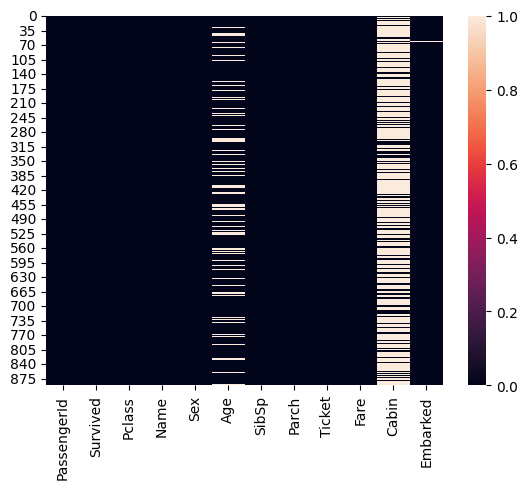

In [14]:
sns.heatmap(df.isnull())

In [15]:
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [16]:
# fill the missing values in the 'Age' column with the mean
df['Age'].fillna(df['Age'].mean(),inplace=True)
# fill the missing values in the 'Embarked' column with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [17]:
# drop the 'Cabin' column from the dataset
df.drop('Cabin',axis=1,inplace=True)

In [18]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# ___Visualizing Dataset After Cleaning___

<Axes: xlabel='Age', ylabel='Survived'>

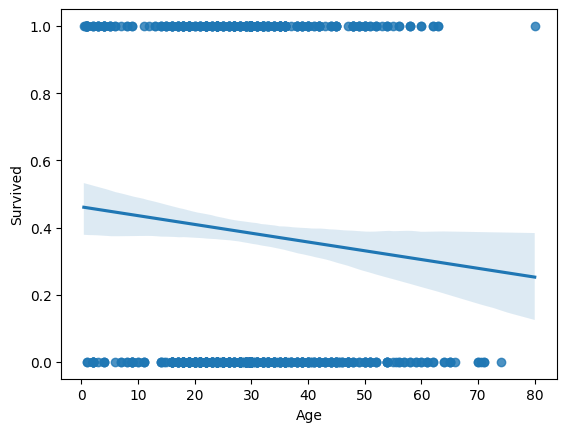

In [19]:
# check the distribution of the 'Age' column
sns.regplot(x='Age',y='Survived',data=df)

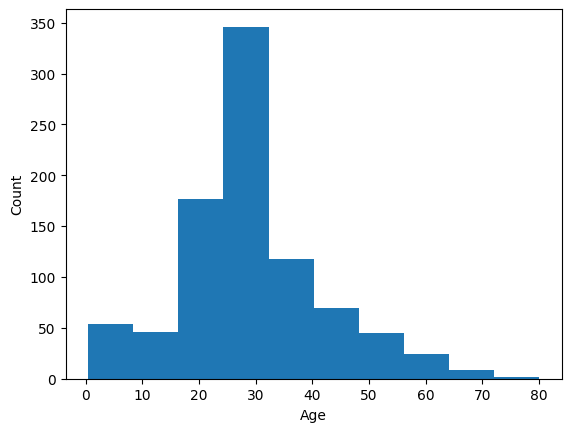

In [20]:
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

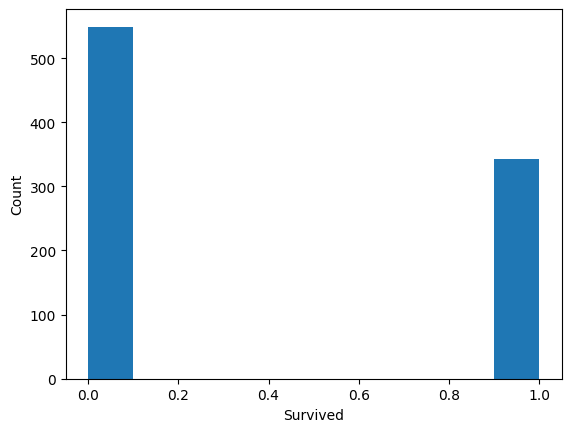

In [21]:
# check the distribution of the 'Survived' column
plt.hist(df['Survived'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

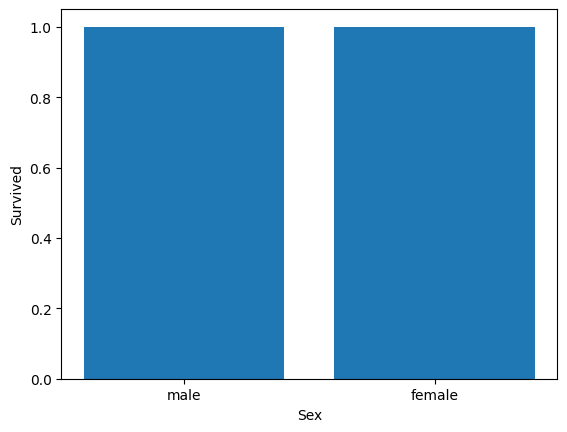

In [22]:
# check the distribution of the 'Sex' column based on 'Survived'
plt.bar(df['Sex'],df['Survived'])
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.show()

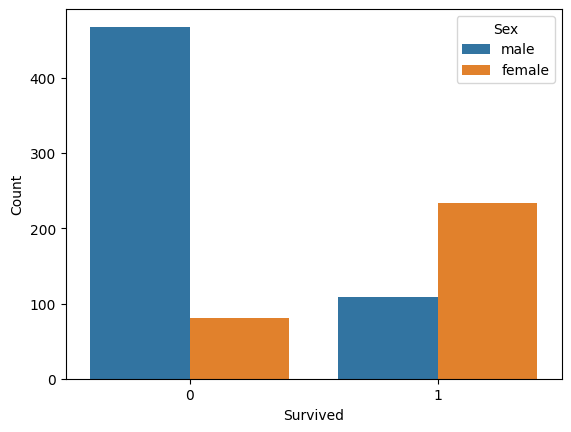

In [23]:
# check the distribution of the 'Survived' column based on 'Sex'
sns.countplot(x='Survived',hue='Sex',data=df)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

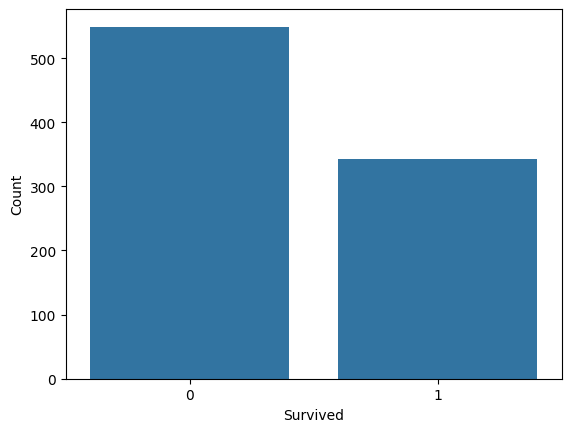

In [24]:
# check the distribution of the 'Survived' column
sns.countplot(x='Survived',data=df)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

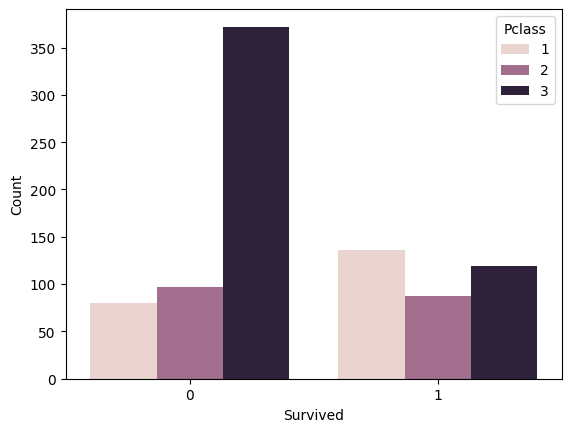

In [25]:
# check the distribution of the 'Survived' column based on 'Pclass'
sns.countplot(x='Survived',hue='Pclass',data=df)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

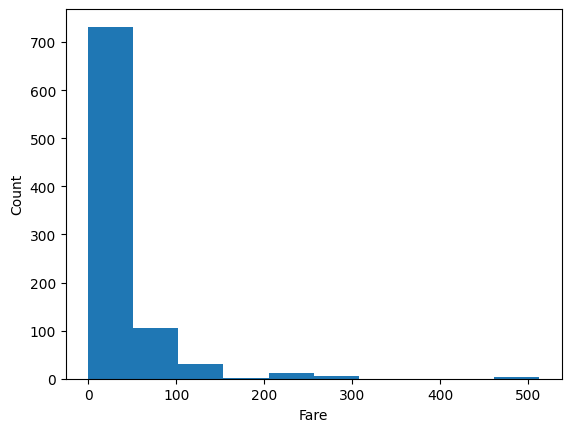

In [26]:
plt.hist(df['Fare'],bins=10)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

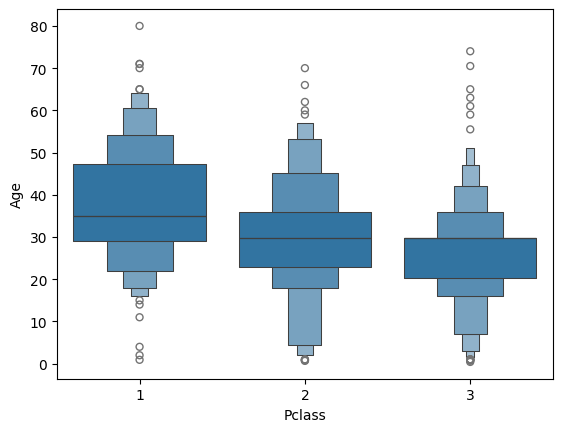

In [27]:
# check the distribution of the 'Pclass' column based on 'Age'
sns.boxenplot(x='Pclass',y='Age',data=df)
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

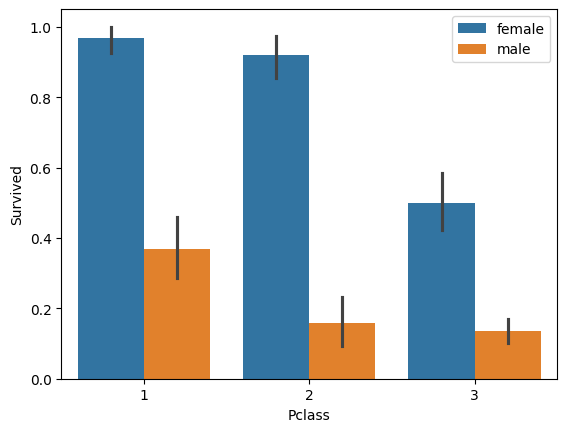

In [28]:
# check the distribution of the 'Pclass' column based on 'Survived'
sns.barplot(x='Pclass',y='Survived',data=df, hue='Sex')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.legend()  
plt.show()

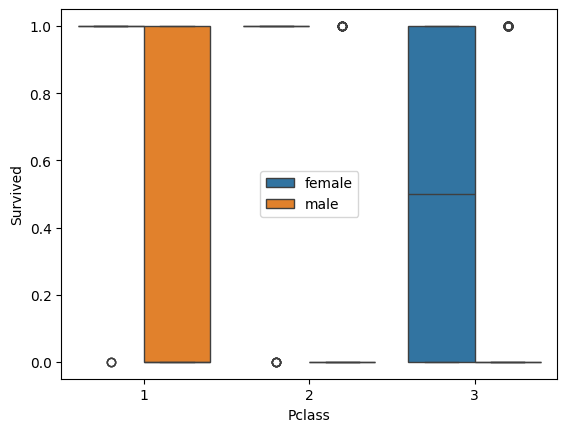

In [29]:
# check the distribution of the 'Pclass' column based on 'Survived'
sns.boxplot(x='Pclass',y='Survived',data=df, hue='Sex')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.legend()
plt.show()

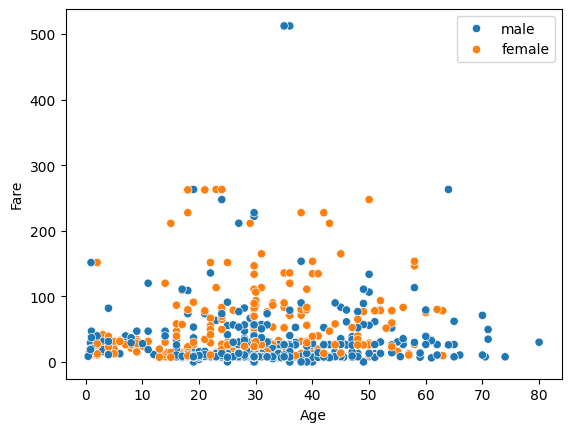

In [30]:
# check the distribution of the 'Age' column based on 'Fare'
sns.scatterplot(x='Age',y='Fare',data=df, hue='Sex')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()

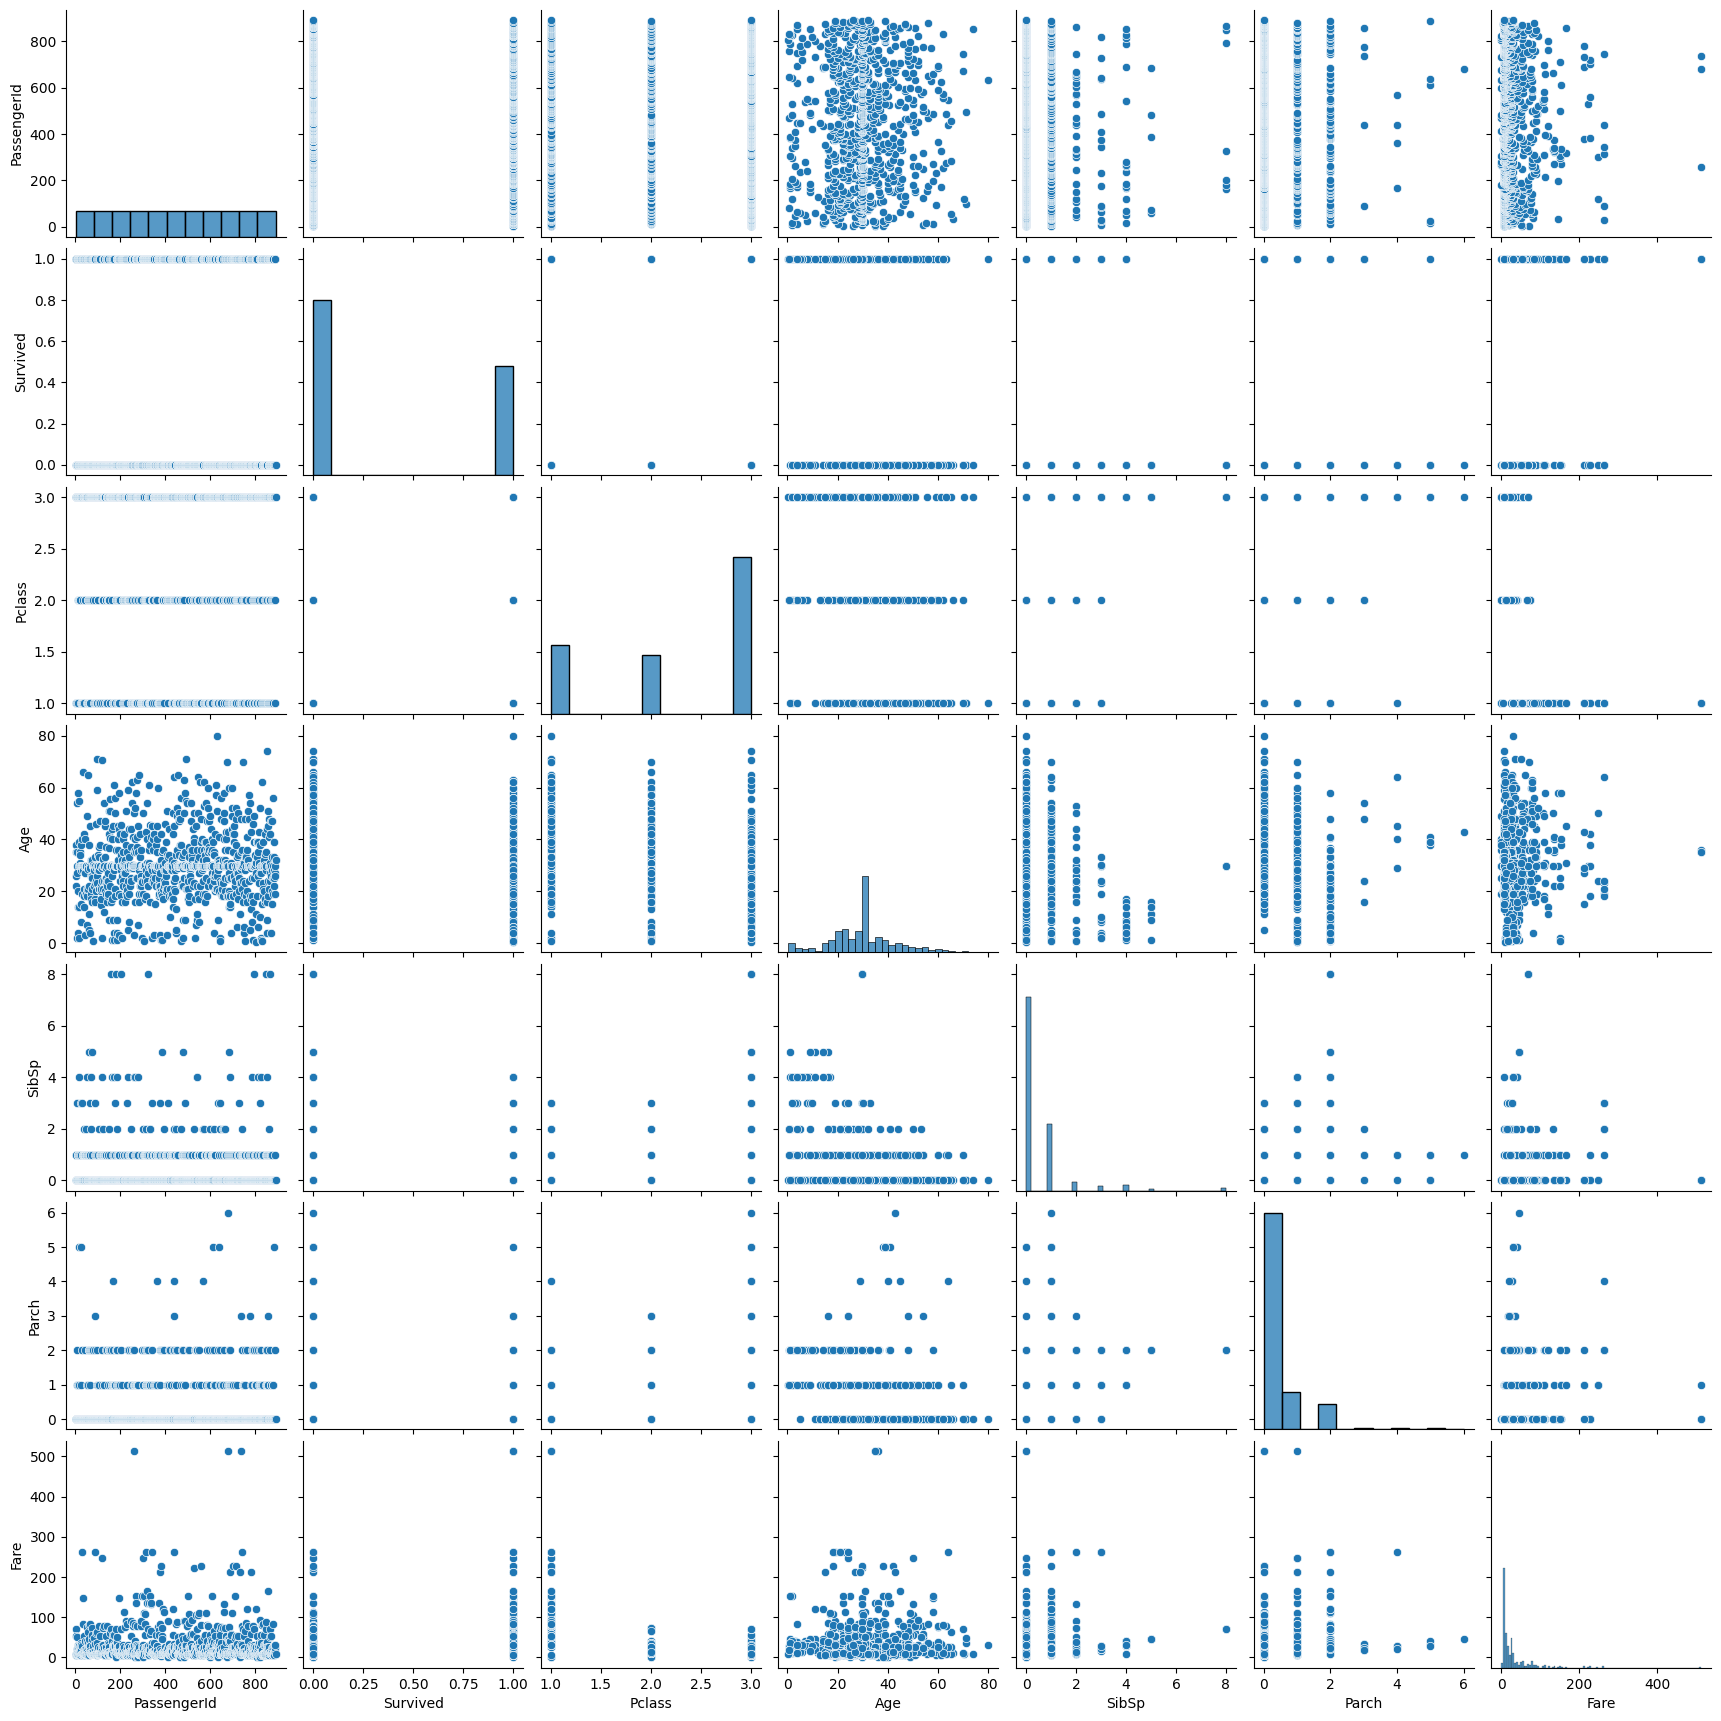

In [31]:
# check the correlation between the features
sns.pairplot(df)

([<matplotlib.patches.Wedge at 0x1dc0551e780>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'Not survived'),
  Text(0.3925750313068116, -1.0275625746369201, 'Survived')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.6%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.4%')])

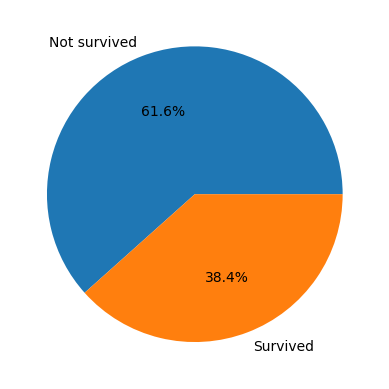

In [32]:
plt.pie(df['Survived'].value_counts(), labels=['Not survived', 'Survived'], autopct='%1.1f%%')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# ___Handling Categorical Features___

In [35]:
# get dummies for 'Sex' and 'Embarked'
sex = pd.get_dummies(df['Sex'],drop_first=True)
Embarked = pd.get_dummies(df['Embarked'],drop_first=True)
# concatenate the dummies
new_df =pd.concat([df,sex,Embarked],axis=1)

In [36]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [37]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  male         891 non-null    bool   
 12  Q            891 non-null    bool   
 13  S            891 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(4)
memory usage: 79.3+ KB


In [38]:
# drop the 'Name','Sex','Ticket','Embarked' columns
new_df.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [39]:
new_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


# ___PreProcessing___

In [40]:
# label encoding for 'male','Q','S'
le = LabelEncoder()
new_df['male'] = le.fit_transform(new_df['male'])
new_df['Q'] = le.fit_transform(new_df['Q'])
new_df['S'] = le.fit_transform(new_df['S'])
new_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


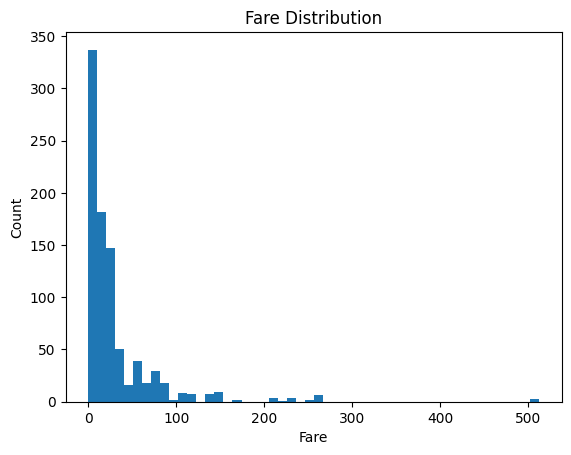

In [41]:
plt.hist(new_df['Fare'],bins=50)
plt.title("Fare Distribution")
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

# ___Build Models___

In [42]:
# feature selection: drop the 'Survived','PassengerId' columns
x = new_df.drop((['Survived','PassengerId']),axis=1)
y = new_df['Survived']

### ___Split Data___

In [52]:
# split the data into train and test
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [53]:
# print the shape of the train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 8)
(179, 8)
(712,)
(179,)


In [54]:
# create the models 
lo = LogisticRegression(penalty="l2",max_iter=1000,solver="lbfgs")
de = DecisionTreeClassifier()
knn = KNeighborsClassifier(5)
rf = RandomForestClassifier(n_estimators=1000)

In [61]:
# Create a pipeline with all the models
my_Pipeline = Pipeline([
    ('logistic regression',lo),
    ('decision tree',de),
    ('knn',knn),
    ('random forest',rf)])

my_Pipeline


Pipeline(steps=[('logistic regression', LogisticRegression(max_iter=1000)),
                ('decision tree', DecisionTreeClassifier()),
                ('knn', KNeighborsClassifier()),
                ('random forest', RandomForestClassifier(n_estimators=1000))])

In [62]:
# fit the models 
print('fit logistic regression',lo.fit(X_train,y_train))
print('fit decision tree',de.fit(X_train,y_train))
print('fit random forest',rf.fit(X_train,y_train))
print('fit knn',knn.fit(X_train,y_train))

fit logistic regression LogisticRegression(max_iter=1000)
fit decision tree DecisionTreeClassifier()
fit random forest RandomForestClassifier(n_estimators=1000)
fit knn KNeighborsClassifier()


In [63]:
# make predictions on the test set 
lo_pr= lo.predict(X_test)
de_pr= de.predict(X_test)
knn_pr= knn.predict(X_test)
rf_pr= rf.predict(X_test)

In [64]:
# print the accuracy score of the models
print('accuracy score of logistic regression',accuracy_score(y_test,lo_pr)*100)
print('accuracy score of decision tree',accuracy_score(y_test,de_pr)*100)
print('accuracy score of knn',accuracy_score(y_test,knn_pr)*100)
print('accuracy score of random forest',accuracy_score(y_test,rf_pr)*100)

accuracy score of logistic regression 81.00558659217877
accuracy score of decision tree 77.6536312849162
accuracy score of knn 70.39106145251397
accuracy score of random forest 81.56424581005587


In [65]:
# create a dataframe of the models and their accuracy scores 
models= [LogisticRegression(penalty="l2",max_iter=1000,solver="lbfgs"),DecisionTreeClassifier(),KNeighborsClassifier(5),RandomForestClassifier(n_estimators=1000)]
models_name = ['Logistic Regression','Decision Tree','KNN','Random Forest']
Accuracy = []
for model in range(len(models)):
    model=models[model]
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    Accuracy.append(accuracy_score(y_test,y_pred)*100)
n_model = pd.DataFrame({'Model':models_name,'Accuracy':Accuracy})

In [66]:
# display the dataframe of the models and their accuracy scores
n_model

,Model,Accuracy
0,Logistic Regression,81.005587
1,Decision Tree,79.329609
2,KNN,70.391061
3,Random Forest,81.005587


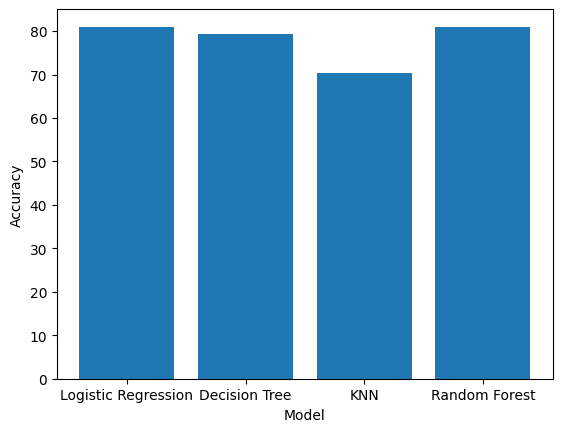

In [67]:
# plot the bar graph of the models and their accuracy scores
plt.bar(n_model['Model'],n_model['Accuracy'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

## ___1-Logistic Regression___

#### Accuracy

In [68]:
print("print accuracy score of logistic regression",accuracy_score(y_test,lo_pr)*100)

print accuracy score of logistic regression 81.00558659217877


#### classification report

In [69]:
print(classification_report(y_test,lo_pr))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



#### Confusion Matrix

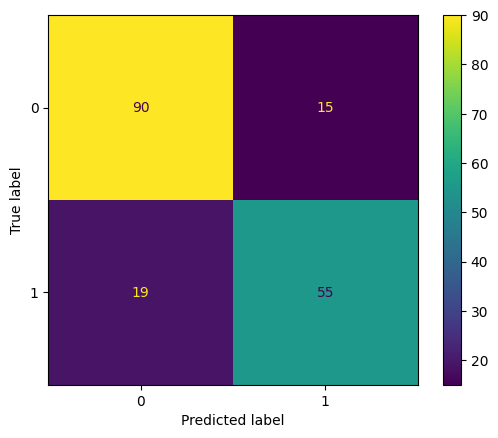

In [70]:
# display the confusion matrix of the models
ConfusionMatrixDisplay.from_predictions(y_test,lo_pr)

## ___2-Decision Tree___

#### Accuracy

In [71]:
# display the confusion matrix of the Decision Tree model
print("print accuracy score of decision tree",accuracy_score(y_test,de_pr)*100)

print accuracy score of decision tree 77.6536312849162


#### classification report

In [72]:
# display the classification report of the Decision Tree model

print(classification_report(y_test,de_pr))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.74      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



#### Confusion Matrix

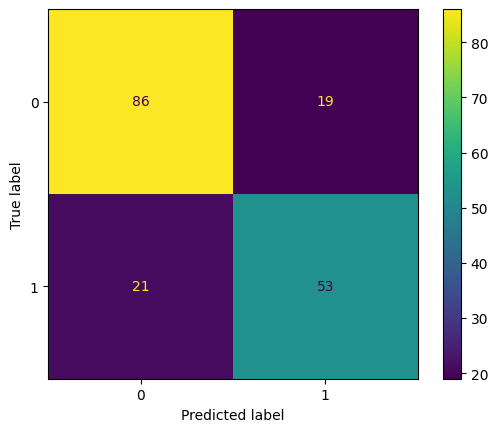

In [73]:
ConfusionMatrixDisplay.from_predictions(y_test,de_pr)

## ___3-KNN___

### Accuracy

In [74]:
# display the confusion matrix of the KNN model
print("print accuracy score of knn",accuracy_score(y_test,knn_pr)*100)

print accuracy score of knn 70.39106145251397


### classification report

In [75]:
# display the classification report of the KNN model
print(classification_report(y_test,knn_pr))

              precision    recall  f1-score   support

           0       0.72      0.82      0.76       105
           1       0.68      0.54      0.60        74

    accuracy                           0.70       179
   macro avg       0.70      0.68      0.68       179
weighted avg       0.70      0.70      0.70       179



### Confusion Matrix

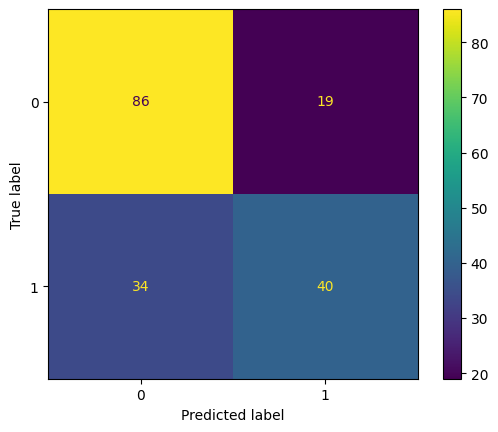

In [76]:
# display the confusion matrix of the KNN model
ConfusionMatrixDisplay.from_predictions(y_test,knn_pr)

## ___4-Random Forest___

### Accuracy

In [77]:
# display the confusion matrix of the Random Forest model
print("print accuracy score of random forest",accuracy_score(y_test,rf_pr)*100)

print accuracy score of random forest 81.56424581005587


### classification report

In [78]:
# display the classification report of the Random Forest model
print(classification_report(y_test,rf_pr))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



### Confusion Matrix

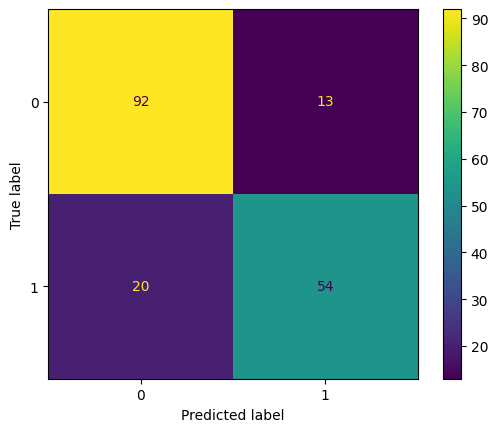

In [79]:
# display the confusion matrix of the Random Forest model
ConfusionMatrixDisplay.from_predictions(y_test,rf_pr)

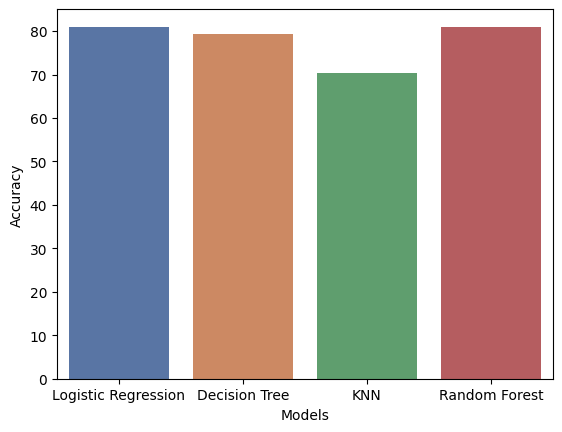

In [89]:
# create a graph of the models and their accuracy scores
sns.barplot(x=n_model['Model'],y=n_model['Accuracy'],palette='deep',data=n_model,hue='Model')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

## Author

<a href="www.linkedin.com/in/muhammad-ahsan-shaikh-881842293">Muhammad Ahsan</a>